In [8]:
library(selbal)
library(reshape)

In [9]:
library(tidyr)

In [10]:
library(tibble)

In [14]:
run_selbal <- function(dataset_name, method, rank) {
    #metaphlan2/VogtmannE_2016.csv"

    path <- "/gfs/data/curated_metagenomes_"
    path = paste(path, method, sep="")
    path = paste(path, dataset_name, sep="/")
    path = paste(path, "csv", sep=".")

    
    print('Reading file')
    mydata <- read.csv(path, header = TRUE, strip.white=TRUE)
    df <- data.frame(mydata)
    print('df ready')

    df_g <- df[df$Rank==rank,]
    df_g <- df_g[df_g$STUDY_CONDITION != '',]
    print('df_g ready.')
    df_g_subset <- subset(df_g, select=c("Sample_ID", "Name", "Abundance"))
    
    print('pivot started....')

    pivot <- spread(df_g_subset, Name, Abundance)
    
    #pivot <- cast(df_g_subset, Sample_ID ~ Name)
    print('Pivot ready.')

    df_cond <- unique(subset(df_g, select=c("Sample_ID", "STUDY_CONDITION")))

    merged <- merge(x = pivot, y = df_cond, by = "Sample_ID", )
    print('Merge ready.')

    merged_sel <- merged[merged$STUDY_CONDITION!='adenoma',]
    head(merged_sel)

    cols = dim(merged_sel)[2]

    # Define x, y and z
    x <- merged_sel[,3:cols-1]
    print('x ready.')
    #y <- merged_sel[,cols]

    #merged_sel$CRC <- merged_sel$STUDY_CONDITION == "CRC"
    #merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC, "Pos")
    #merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC != "Pos", "Neg")
    #y <- merged_sel$CRC
    #y_fact <- factor(c(y))

    #y_fact <- factor(c(merged_sel$STUDY_CONDITION))
    y_fact <- factor(merged_sel$STUDY_CONDITION)
    write.csv(merged_sel,'y.csv')
    print('y ready.')
    #merged_sel$STUDY_CONDITION[merged_sel$STUDY_CONDITION != 1]  <- 0

    #min(merged_sel[!is.na(merged_sel)])
    #b = apply(merged_sel, 1, function(x) 1/as.numeric(min(x, na.rm = TRUE)))
    x_2 = x

    #for (r in 1:dim(x_2)[1]){
    #    x_2[r,] = round(x_2[r,]*b[r])
    #}

    x_2[is.na(x_2)] <- 0
    
    print('x2 un-zerod.')

    rows = dim(x_2)[1]

    for (col_name in colnames(x_2)){
    col = x_2[col_name]
    if (sum(col != 0) <= rows*0.2){
      drop <- c(col_name)
      x_2 = x_2[,!(names(x_2) %in% drop)]
    }
    }
    print('x2 ready.')
    x_2[is.na(x_2)] <- 0
    
    print('Selbal started.')
    
    
    result <- selbal.cv(x = x_2, y = y_fact, covar = NULL, n.fold = 5, n.iter = 10, logit.acc = "AUC")
    print('Selbal finished.')
    
    path_for_plot = "save/"
    path_for_plot = paste(path_for_plot, dataset_name, sep="")
    path_for_plot = paste(path_for_plot, method, sep="_")
    path_for_plot = paste(path_for_plot, rank, sep="_")

    svg(paste(path_for_plot, "accuracy.svg", sep="_"))
    plot(result$accuracy.nvar)
    dev.off()

    svg(paste(path_for_plot, "barplot.svg", sep="_"))
    plot(result$var.barplot)
    dev.off()

    svg(paste(path_for_plot, "globalplot.svg", sep="_"))
    grid.draw(result$global.plot)
    dev.off()

    svg(paste(path_for_plot, "cvtab.svg", sep="_"))
    plot.tab(result$cv.tab)
    dev.off()

    return (result)
}

In [15]:
result = run_selbal("FengQ_2015", "metaphlan2", "p")

[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .


, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases




############################################################### 
 . . . FINISHED. 
###############################################################[1] "Selbal finished."


In [21]:
result$logc

,Actinobacteria,Ascomycota,Bacteroidetes,Candidatus_Saccharibacteria,Deinococcus_Thermus,Euryarchaeota,Firmicutes,Fusobacteria,Proteobacteria,Verrucomicrobia,Viruses_noname
1,-2.5492771,-13.776290,-2.158420,-12.038019,-11.712818,-12.993530,-0.35388040,-13.504356,-5.2355304,-11.913422,-2.312170
2,-2.1612693,-9.115055,-2.197974,-12.038019,-11.721408,-4.096969,-0.27983684,-13.504356,-6.8061265,-10.756828,-11.551666
3,-1.7553381,-13.776290,-3.101226,-12.038019,-11.720932,-12.993530,-0.42305948,-13.504356,-7.4459805,-2.067470,-11.551666
5,-1.3484466,-13.776290,-4.919164,-9.569899,-11.721570,-12.993530,-0.31457550,-13.504356,-7.1289232,-6.185557,-11.551666
6,-0.7097932,-7.795228,-4.761603,-9.929844,-11.720150,-12.993530,-0.70282171,-13.504356,-5.7833256,-13.776290,-6.943914
7,-0.8457056,-13.776290,-6.920347,-8.732257,-11.718511,-12.993530,-0.62695166,-13.504356,-4.9083444,-9.232599,-3.579712
9,-0.8966724,-13.776290,-4.390552,-9.298088,-11.719413,-8.564818,-1.06846458,-6.706294,-1.4515364,-8.204218,-8.822370
10,-3.3184752,-13.776290,-4.545365,-12.038019,-11.721806,-4.094326,-0.06888780,-13.504356,-7.3912431,-13.776290,-6.014441
11,-3.6908026,-10.903169,-2.620521,-12.038019,-9.822839,-12.993530,-0.10956419,-8.785736,-5.5265330,-13.776290,-6.295827
12,-2.4247258,-10.274576,-3.880152,-12.038019,-11.721464,-5.256529,-0.26955196,-13.504356,-2.1054065,-9.732926,-11.551666


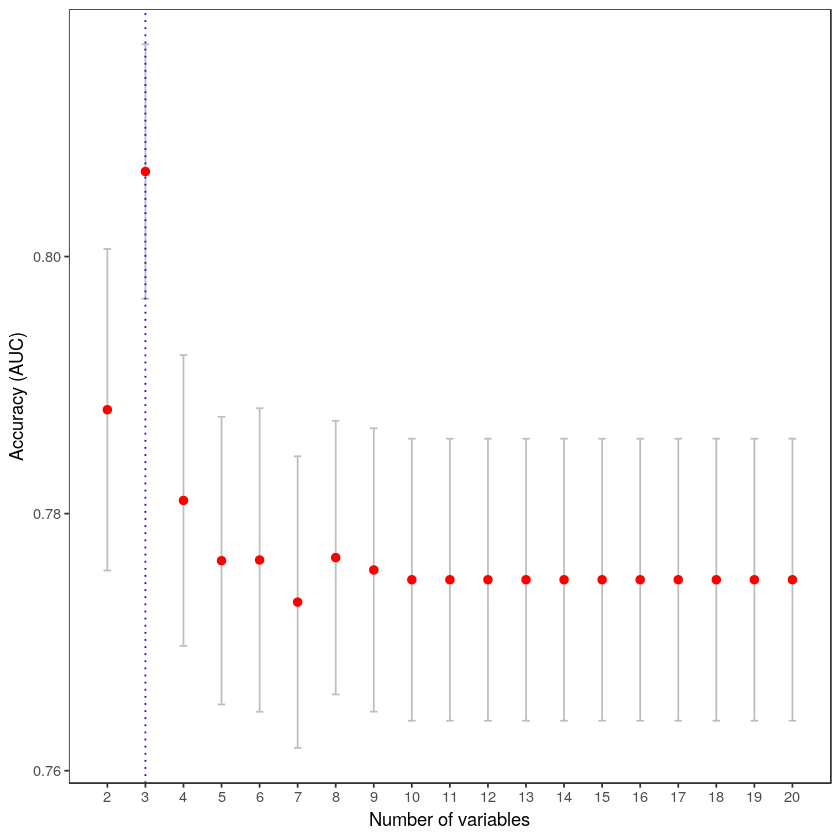

$accuracy.nvar

$var.barplot

$global.plot
TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

$global.plot2
TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

$ROC.plot

$cv.tab
                 % Global   V2   V4   V3
Fusobacteria   100    DEN  DEN  DEN  DEN
Firmicutes      98    NUM  NUM  NUM  NUM
Bacteroidetes   58    DEN  DEN    0    0
Actinobacteria  36      0    0  NUM    0
Ascomycota       4      0    0    0  NUM
FREQ             -      - 0.58 0.34 0.04

$cv.accuracy
 [1] 0.6944444 0.7863248 0.7777778 0.9000000 0.9814815 0.9351852 0.8290598
 [8] 0.7777778 0.8750000 0.7500000 0.8611111 0.7777778 0.7592593 0.8916667
[15] 0.6759259 0.6666667 0.8205128 0.7962963 0.7833333 0.8703704

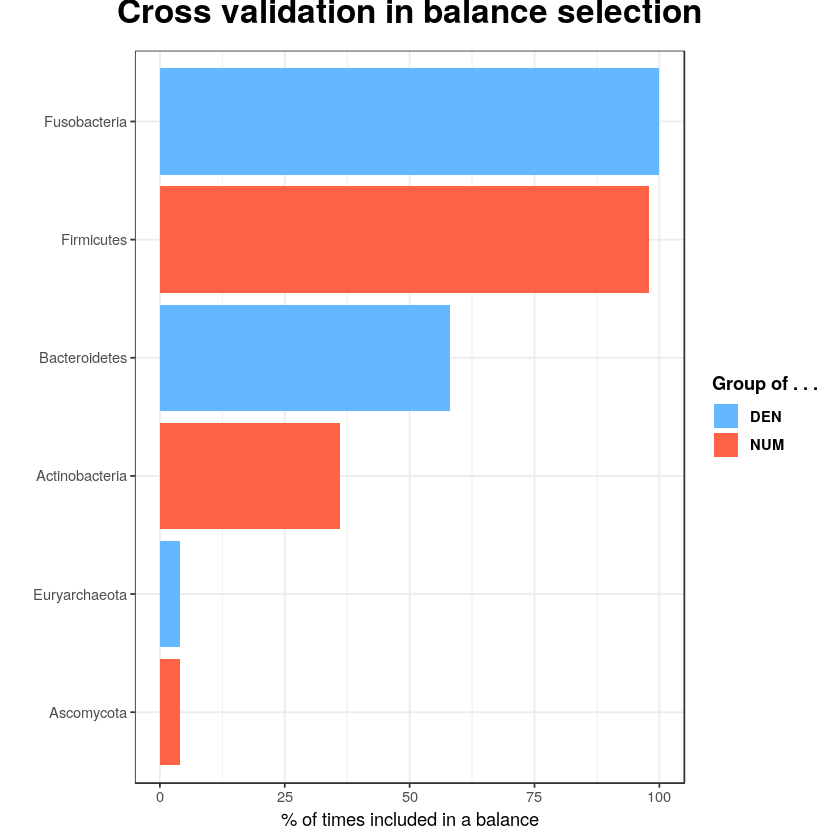

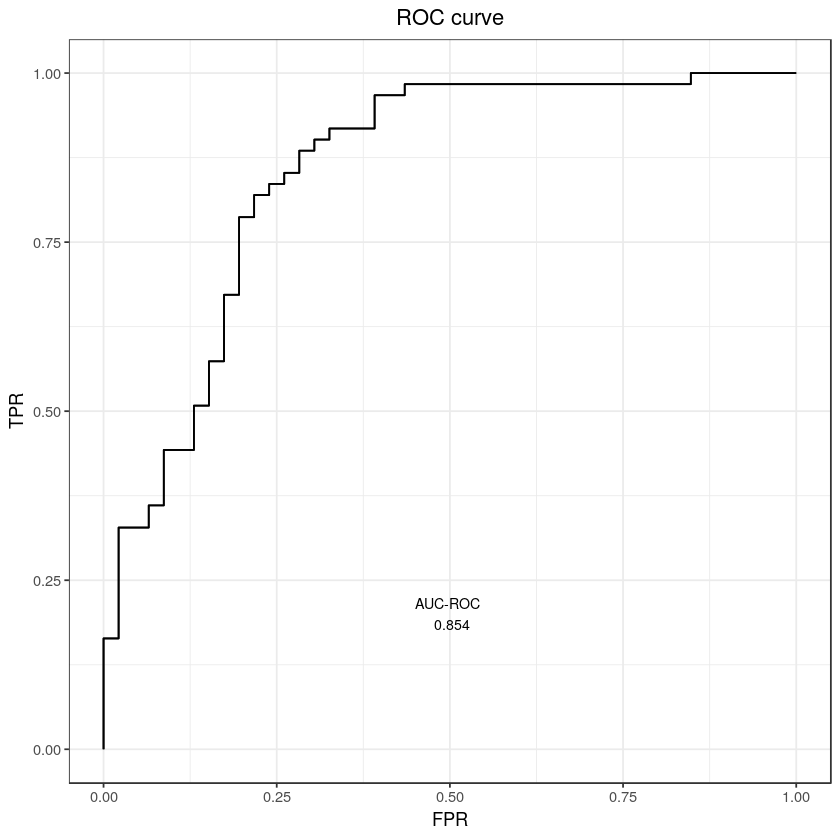

In [19]:
result

In [42]:
a <- c(1, 5, 'dsgfsgf')
length(a)
a
typeof(a)

[1] 3

[1] "1"       "5"       "dsgfsgf"

[1] "character"

In [75]:
#result$lbexport
#result$cv.tab

result$cv.tab[result$cv.tab[,2]=="DEN",]
logc <- result$logc


DEN <- result$cv.tab[result$cv.tab[,2]=="DEN",][0]
NUM <- result$cv.tab[result$cv.tab[,2]=="NUM",][0]
k1 <- length(NUM)
k2 <- length(DEN)
DEN <- c("Fusobacteria", "Bacteroidetes")
NUM <- c("Firmicutes")
k1 <- length(NUM)
k2 <- length(DEN)

#sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))

length(logc$Firmicutes)
balance_values <- sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))
write.table(balance_values, 'balance_FengQ_2015_p_.csv'  , append= T, sep='\t')

,%,Global,V2,V4,V3
Fusobacteria,100,DEN,DEN,DEN,DEN
Bacteroidetes,58,DEN,DEN,0,0


[1] 107

Warning message in write.table(balance_values, "test.csv", append = T, sep = "\t"):
"appending column names to file"

In [7]:
logc <- result$logc


#FINAL.BAL <- sqrt((k1*k2)/(k1+k2))*(rowM(logc[,NUM])- rowM(logc[,DEN]))


In [1]:
logc

ERROR: Error in eval(expr, envir, enclos): object 'logc' not found


In [7]:
result = run_selbal("FengQ_2015", "metaphlan2", "p")


[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .



Loading required package: MASS
Loading required package: NADA
Loading required package: survival

Attaching package: 'NADA'

The following object is masked from 'package:stats':

    cor

Loading required package: truncnorm



, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases

Attaching package: 'gridExtra'

The following object is masked from 'package:Biobase':

    combine

The following object is masked from 'package:BiocGenerics':

    combine





############################################################### 
 . . . FINISHED. 
###############################################################[1] "Selbal finished."


ERROR: Error in return(result, y): multi-argument returns are not permitted


In [17]:
result = run_selbal("VogtmannE_2016", "kraken2", "P")



[1] "Reading file"
[1] "df ready"
[1] "df_g ready."
[1] "pivot started...."
[1] "Pivot ready."
[1] "Merge ready."
[1] "x ready."
[1] "y ready."
[1] "x2 un-zerod."
[1] "x2 ready."
[1] "Selbal started."


############################################################### 
 STARTING selbal.cv FUNCTION 
###############################################################

#-------------------------------------------------------------# 
# ZERO REPLACEMENT . . .


, . . . FINISHED. 
#-------------------------------------------------------------#

#-------------------------------------------------------------# 
# Starting the cross - validation procedure . . .
 . . . finished. 
#-------------------------------------------------------------# 
###############################################################

 The optimal number of variables is: 3 



Setting levels: control = CRC, case = control
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases




############################################################### 
 . . . FINISHED. 
###############################################################[1] "Selbal finished."


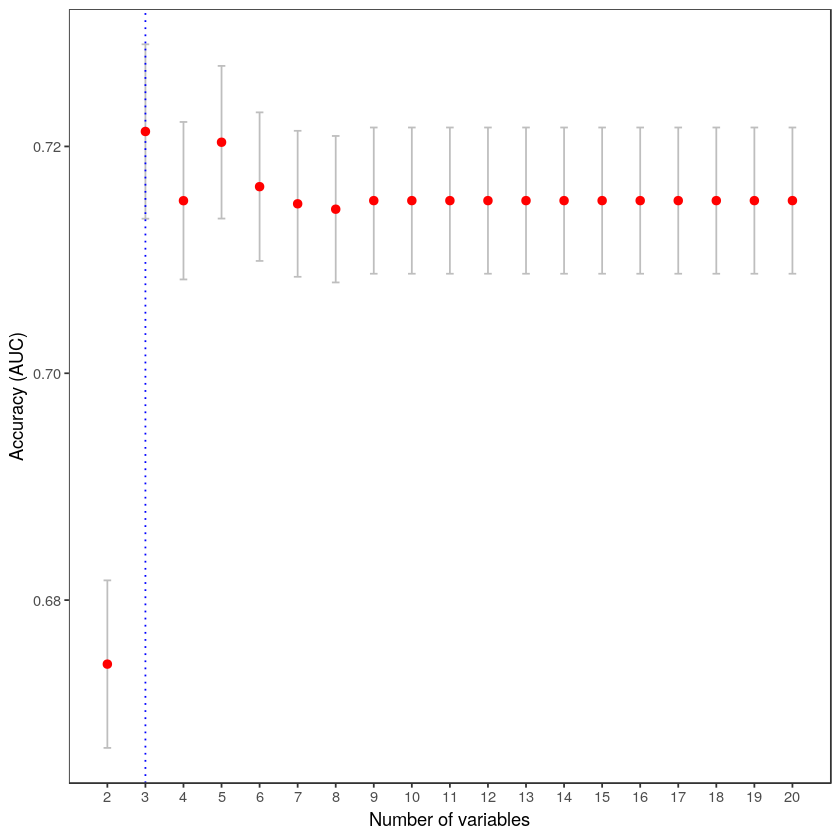

$accuracy.nvar

$var.barplot

$global.plot
TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

$global.plot2
TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

$ROC.plot

$cv.tab
                 % Global  V3   V4   V5
Tenericutes    100    NUM NUM  NUM  NUM
Chordata        88    DEN DEN  DEN  DEN
Synergistetes   62    DEN DEN    0    0
Fusobacteria    24      0   0    0  DEN
Proteobacteria  18      0   0  DEN    0
FREQ             -      - 0.6 0.12 0.12

$cv.accuracy
 [1] 0.8049887 0.6609977 0.6853741 0.5934959 0.7691850 0.6601474 0.7358277
 [8] 0.7429138 0.7595819 0.7668055 0.7519841 0.7431973 0.6581633 0.7897793
[15] 0.7911957 0.6284014 0.7151361 0.7329932 0.7558072 0.7287329 0.6703

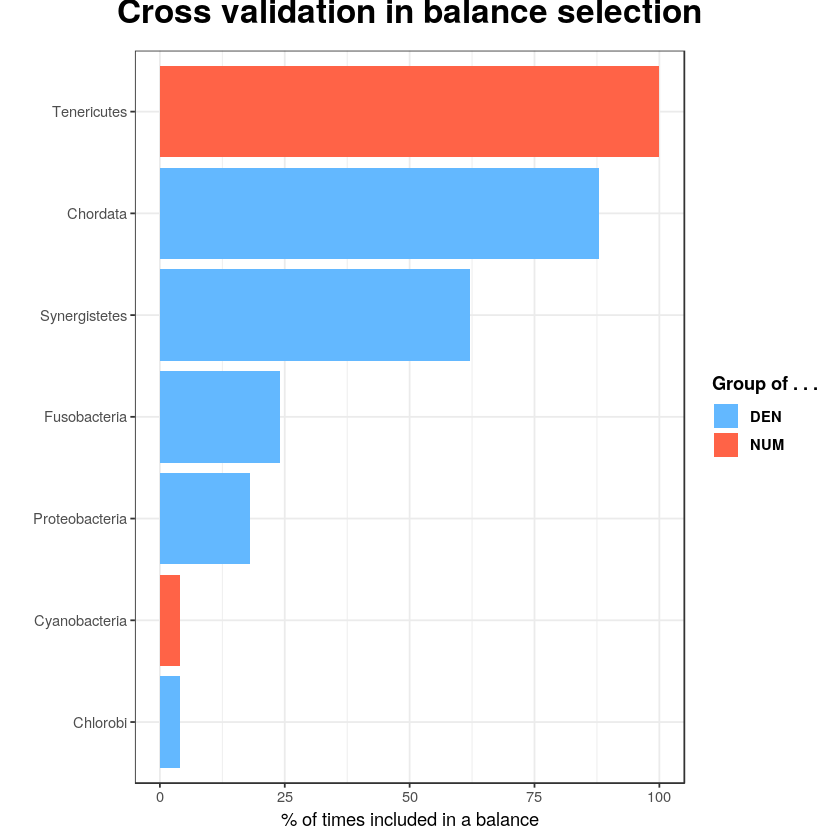

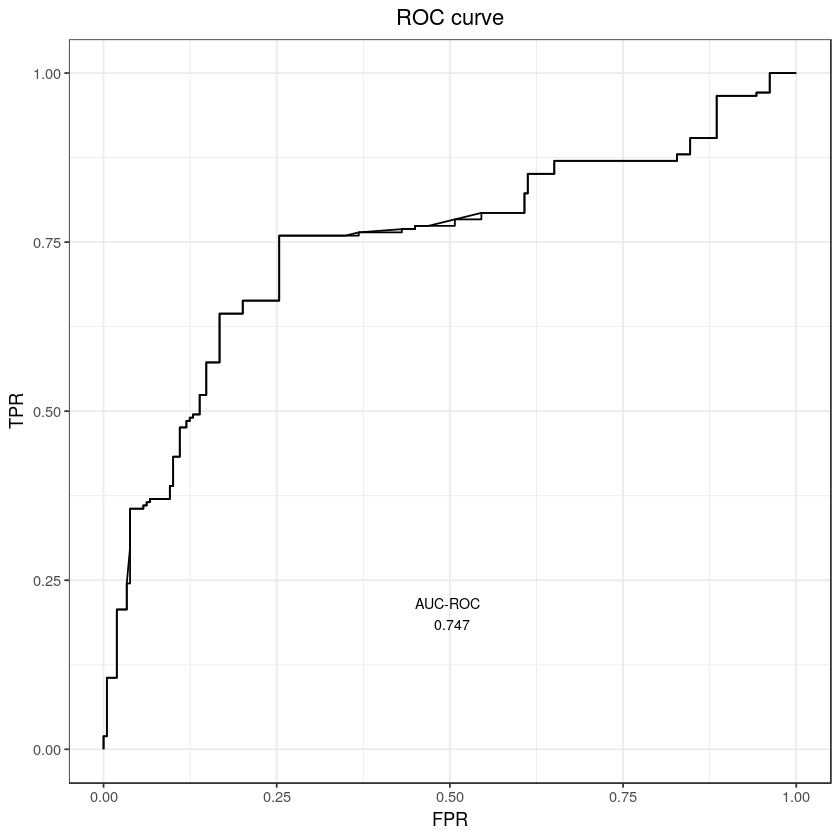

In [18]:
result


In [ ]:
dataset_name = "VogtmannE_2016"
method =  "metaphlan2"
rank = "p"
result = run_selbal(dataset_name, method, rank)

In [ ]:
dataset_list <- list("VogtmannE_2016", "FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g", "s")
rank_list_kraken <- list("P", "C", "F", "G", "S")

In [ ]:
dataset_list <- list("FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g", "s")
rank_list_kraken <- list("P", "C", "F", "G", "S")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("FengQ_2015", "YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g")
rank_list_kraken <- list("P", "C", "F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            if (dataset_name == "FengQ_2015"){
                rank_list = list()
            }
            else {
                rank_list = rank_list_metaphlan
            }
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("FengQ_2015")
method_list <- list("kraken2")
rank_list_kraken <- list("F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            if (dataset_name == "FengQ_2015"){
                rank_list = list()
            }
            else {
                rank_list = rank_list_metaphlan
            }
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_list <- list("YuJ_2015")
method_list <- list("metaphlan2", "kraken2")
rank_list_metaphlan <- list("p", "c", "f", "g")
rank_list_kraken <- list("P", "C", "F", "G")

In [ ]:
for (dataset_name in dataset_list){
    for (method in method_list){
        if (method == "metaphlan2"){
            rank_list = rank_list_metaphlan
        }
        if (method == "kraken2"){
            rank_list = rank_list_kraken
        }
        for (rank in rank_list){
            print("########################################")
            print(paste(paste(dataset_name, method, sep=" "), rank, sep=" "))
            print("########################################")
            run_selbal(dataset_name, method, rank)
        }    
    }
}

In [ ]:
dataset_name <- "YuJ_2015"
method <- "metaphlan2"
rank <- "p"

In [ ]:
path <- "/gfs/data/curated_metagenomes_"
path = paste(path, method, sep="")
path = paste(path, dataset_name, sep="/")
path = paste(path, "csv", sep=".")

mydata <- read.csv(path, header = TRUE, strip.white=TRUE)

In [ ]:
head(mydata)

In [ ]:
path <- "/gfs/data/curated_metagenomes_"
path = paste(path, method, sep="")
path = paste(path, dataset_name, sep="/")
path = paste(path, "csv", sep=".")

mydata <- read.csv(path, header = TRUE, strip.white=TRUE)
df <- data.frame(mydata)

df_g <- df[df$Rank==rank,]
df_g <- df_g[df_g$STUDY_CONDITION != '',]

df_g_subset <- subset(df_g, select=c("Sample_ID", "Name", "Abundance"))
pivot <- cast(df_g_subset, Sample_ID ~ Name)

df_cond <- unique(subset(df_g, select=c("Sample_ID", "STUDY_CONDITION")))

merged <- merge(x = pivot, y = df_cond, by = "Sample_ID", )

merged_sel <- merged[merged$STUDY_CONDITION!='adenoma',]
head(merged_sel)

cols = dim(merged_sel)[2]

# Define x, y and z
x <- merged_sel[,3:cols-1]
#y <- merged_sel[,cols]

#merged_sel$CRC <- merged_sel$STUDY_CONDITION == "CRC"
#merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC, "Pos")
#merged_sel$CRC <- replace(merged_sel$CRC, merged_sel$CRC != "Pos", "Neg")
#y <- merged_sel$CRC
#y_fact <- factor(c(y))

#y_fact <- factor(c(merged_sel$STUDY_CONDITION))
y_fact <- factor(merged_sel$STUDY_CONDITION)
#merged_sel$STUDY_CONDITION[merged_sel$STUDY_CONDITION != 1]  <- 0

#min(merged_sel[!is.na(merged_sel)])
#b = apply(merged_sel, 1, function(x) 1/as.numeric(min(x, na.rm = TRUE)))
x_2 = x

#for (r in 1:dim(x_2)[1]){
#    x_2[r,] = round(x_2[r,]*b[r])
#}

x_2[is.na(x_2)] <- 0
unique(y)

rows = dim(x_2)[1]

for (col_name in colnames(x_2)){
col = x_2[col_name]
if (sum(col != 0) <= rows*0.2){
  drop <- c(col_name)
  x_2 = x_2[,!(names(x_2) %in% drop)]
}
}
x_2[is.na(x_2)] <- 0

result <- selbal.cv(x = x_2, y = y_fact, covar = NULL, n.fold = 5, n.iter = 10, logit.acc = "AUC")

path_for_plot = "save/"
path_for_plot = paste(path_for_plot, dataset_name, sep="")
path_for_plot = paste(path_for_plot, method, sep="_")
path_for_plot = paste(path_for_plot, rank, sep="_")

svg(paste(path_for_plot, "accuracy.svg", sep="_"))
plot(result$accuracy.nvar)
dev.off()

svg(paste(path_for_plot, "barplot.svg", sep="_"))
plot(result$var.barplot)
dev.off()

svg(paste(path_for_plot, "globalplot.svg", sep="_"))
grid.draw(result$global.plot)
dev.off()

svg(paste(path_for_plot, "cvtab.svg", sep="_"))
plot.tab(result$cv.tab)
dev.off()
